In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
x = np.array([1,2,3,4,5,6]).reshape(-1,1)
y = np.array([35,40,50,60,65,70])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures



In [4]:
lg = LinearRegression()
lg.fit(x_train,y_train)

LinearRegression()

In [5]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [6]:
print("Train MSE:",mean_squared_error(y_train,y_train_pred))
print("Train R2:",r2_score(y_train,y_train_pred))


Train MSE: 1.875
Train R2: 0.9657142857142857


Text(0.5, 1.0, 'good fit:marks vs study')

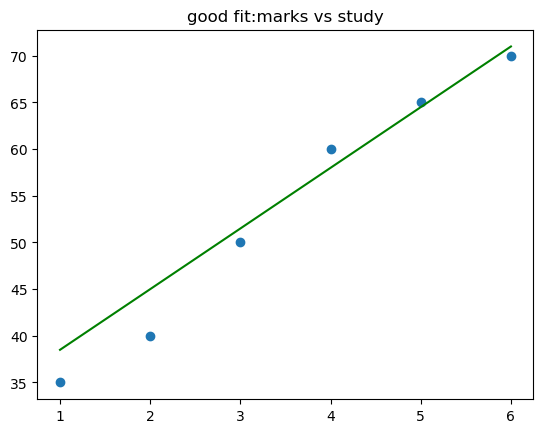

In [7]:
plt.scatter(x,y)
plt.plot(x,lg.predict(x),color = "green")
plt.title("good fit:marks vs study")

In [10]:
poly = PolynomialFeatures(degree=5)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

overfit_model = LinearRegression()
overfit_model.fit(x_train_poly,y_train)
y_train_pp = overfit_model.predict(x_train_poly)
y_test_pp = overfit_model.predict(x_test_poly)

In [12]:
print("Train MSE:",mean_squared_error(y_train,y_train_pp))
print("Train R2:",r2_score(y_train,y_train_pp))

Train MSE: 8.304168355306064e-24
Train R2: 1.0


In [14]:
x_poly = poly.fit_transform(x)

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(x_poly,y)
y_ridge_pred = ridge.predict(x_poly)

In [16]:
print("r2 score:",r2_score(y,y_ridge_pred))
print("Mse:",mean_squared_error(y,y_ridge_pred))

r2 score: 0.9985320506949084
Mse: 0.24058058055667686


In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(x_poly,y)
y_lasso_pred = lasso.predict(x_poly)

C:\Users\bojja\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.580e+00, tolerance: 9.833e-02
  model = cd_fast.enet_coordinate_descent(


In [18]:
print("r2 score:",r2_score(y,y_lasso_pred))
print("Mse:",mean_squared_error(y,y_lasso_pred))

r2 score: 0.9952849859388768
Mse: 0.7727384155729718
